In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../dados"))

['all.zip', 'crop_test', 'crop_train', 'model-files', 'sample_submission.csv', 'test', 'test.zip', 'train', 'train.csv', 'train.zip']


In [2]:
import tensorflow as tf
import random
import time
import cv2

from skimage import io
from pylab import rcParams

from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage import data, color

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D,BatchNormalization,AveragePooling2D
from keras.layers import Conv2D, MaxPooling2D

from keras.preprocessing.image import (
    random_rotation, random_shift, random_shear, random_zoom,
    random_channel_shift,img_to_array, ImageDataGenerator)

import numpy as np
import pandas as pd

import warnings
from glob import glob

print('TensorFlow version:', tf.__version__)
print('Keras version:', keras.__version__)

TensorFlow version: 1.8.0
Keras version: 2.1.6


Using TensorFlow backend.


In [3]:
TRAIN_IMAGE_PATH = "../dados/train/"
TEST_IMAGE_PATH = "../dados/test/"
TRAINING_DATA='../dados/train.csv'
IMG_SIZE = 128

In [4]:
df_train = pd.read_csv(TRAINING_DATA)
del_ind = []

for i in range(len(df_train)):
    if df_train.iloc[i]['Id'] == 'new_whale':
        del_ind.append(i)
df_train = df_train.drop(df_train.index[del_ind])
print(len(df_train))

#string to unique int
#set unique int value for each unique classes sring.. string to int
unique_calsses_value = np.unique(df_train[['Id']].values)
#unique_calsses_value = np.delete(unique_calsses_value,[0])
print(unique_calsses_value)
unique_classes_id_dict = {}
unique_id_classes_dict = {}
for i in range(len(unique_calsses_value)):
    unique_classes_id_dict[unique_calsses_value[i]] = i
    unique_id_classes_dict[i] = unique_calsses_value[i]
print(len(unique_id_classes_dict))

15697
['w_0003639' 'w_0003c59' 'w_0027efa' ..., 'w_ffa6d42' 'w_ffcf5fe'
 'w_ffe8693']
5004


In [5]:
df_train['classes_id'] = df_train.apply (lambda row: unique_classes_id_dict.get(row['Id']),axis=1)

df_train.head(15)
len(df_train)

15697

In [6]:
def show_image(image):
    plt.imshow(image)
def plot_images(images):
    rcParams['figure.figsize'] = 14, 8
    plt.gray()
    fig = plt.figure()
    for i in range(min(9, images.shape[0])):
        fig.add_subplot(3, 3, i+1)
        show_image(images[i])
    plt.show()   

In [7]:
#resize the image
def LoadImage(img_path):
    image = color.rgb2gray(io.imread(img_path))
    image_resized = resize(image,(IMG_SIZE,IMG_SIZE))
    return image_resized[:,:] / 255.
#load  images data and classes id
def LoadImageData(path):
    xs = []
    ys = []
    #for ex_paths in paths:
    for index, row in df_train.iterrows():        
        img_path = path + row['Image']
        igm = LoadImage(img_path)
        xs.append(igm)
        ys.append(row['classes_id'])
        print(index)
    return np.array(xs),np.array(ys)

In [8]:
X_train,Y_train = LoadImageData(TRAIN_IMAGE_PATH)
print("Loaded")

C:\bin\anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


0
1
2
6
8
9
10
16
17
21
23
26
27
28
29
30
31
32
35
36
37
39
41
43
44
45
46
47
48
52
53
54
56
57
58
60
61
62
63
64
66
68
70
71
72
73
74
75
76
78
80
81
82
83
84
85
90
91
92
94
95
98
99
100
102
103
107
108
109
110
112
113
115
116
117
119
120
121
124
125
127
130
131
132
133
135
136
137
138
139
140
141
143
144
145
146
148
149
152
154
158
159
162
163
164
166
167
168
169
172
173
178
181
186
190
192
193
195
196
197
200
201
203
206
207
208
209
210
214
217
219
220
221
223
224
225
226
227
229
231
232
233
234
235
236
237
238
239
240
241
242
243
246
247
249
250
252
255
256
257
258
259
260
261
263
264
266
269
270
271
272
273
274
275
276
277
278
280
283
284
285
287
290
294
295
297
298
299
300
303
304
306
308
309
311
313
314
316
317
318
319
324
325
326
329
330
331
332
333
334
335
336
337
338
339
340
342
343
344
347
348
350
352
353
357
358
359
363
364
367
371
372
373
374
375
376
377
381
382
383
384
386
388
393
396
397
398
400
403
404
405
408
409
411
412
413
414
416
418
419
422
424
425
426
427
428
429
4

2918
2920
2922
2923
2924
2925
2927
2928
2929
2931
2932
2933
2938
2939
2940
2941
2944
2945
2946
2948
2949
2951
2952
2955
2959
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2976
2980
2982
2983
2986
2988
2989
2990
2991
2992
2994
2997
3000
3001
3003
3004
3007
3008
3009
3010
3011
3014
3015
3016
3017
3019
3020
3021
3022
3023
3024
3025
3027
3030
3031
3032
3033
3034
3037
3038
3039
3040
3041
3043
3044
3046
3051
3052
3053
3054
3055
3056
3058
3060
3061
3066
3067
3068
3071
3075
3078
3079
3080
3081
3082
3083
3084
3086
3089
3091
3092
3093
3095
3097
3098
3099
3102
3103
3106
3107
3110
3111
3114
3115
3117
3118
3121
3122
3123
3124
3125
3127
3128
3131
3132
3133
3134
3135
3136
3137
3139
3140
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3156
3157
3158
3160
3161
3164
3165
3167
3170
3171
3173
3174
3176
3177
3180
3181
3184
3185
3186
3188
3191
3192
3194
3196
3197
3198
3201
3202
3205
3206
3208
3209
3211
3212
3217
3218
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3235


5580
5582
5584
5585
5586
5588
5589
5590
5591
5592
5593
5594
5596
5597
5598
5601
5602
5604
5605
5607
5610
5616
5617
5619
5620
5622
5623
5624
5626
5628
5630
5631
5632
5635
5637
5638
5640
5641
5642
5643
5644
5645
5646
5648
5649
5651
5653
5654
5655
5657
5658
5659
5660
5663
5664
5666
5670
5671
5672
5675
5676
5679
5682
5683
5685
5687
5692
5693
5695
5696
5697
5698
5699
5700
5702
5705
5706
5708
5710
5711
5712
5713
5714
5715
5718
5719
5720
5721
5724
5725
5727
5728
5729
5730
5731
5732
5733
5736
5737
5738
5739
5740
5741
5744
5745
5747
5748
5749
5752
5753
5755
5759
5761
5762
5764
5767
5769
5770
5774
5775
5778
5779
5780
5782
5783
5784
5786
5789
5791
5792
5793
5797
5798
5800
5801
5802
5803
5804
5805
5807
5809
5811
5813
5815
5817
5823
5824
5825
5826
5827
5828
5830
5833
5834
5835
5836
5837
5838
5841
5842
5843
5844
5846
5847
5849
5850
5852
5853
5855
5856
5858
5859
5865
5868
5869
5870
5871
5873
5874
5875
5876
5879
5882
5883
5885
5887
5888
5889
5891
5894
5895
5898
5900
5906
5909
5910
5911
5912
5913
5914


8242
8243
8246
8247
8249
8250
8255
8258
8259
8260
8261
8262
8264
8265
8266
8267
8270
8271
8272
8274
8277
8279
8281
8283
8286
8289
8290
8291
8293
8294
8295
8297
8298
8299
8300
8302
8304
8306
8307
8309
8312
8315
8316
8320
8321
8322
8323
8324
8326
8327
8328
8333
8335
8338
8339
8340
8341
8342
8343
8344
8347
8348
8350
8351
8352
8354
8357
8358
8359
8361
8362
8364
8369
8372
8373
8374
8375
8376
8377
8380
8381
8382
8383
8384
8385
8392
8394
8395
8397
8400
8401
8403
8404
8405
8407
8409
8412
8413
8415
8417
8418
8419
8420
8423
8428
8429
8430
8432
8433
8434
8435
8436
8438
8440
8441
8442
8443
8445
8447
8449
8450
8451
8454
8455
8456
8458
8463
8464
8465
8467
8468
8470
8471
8472
8473
8476
8477
8481
8483
8484
8486
8488
8489
8492
8494
8495
8497
8498
8500
8502
8504
8515
8519
8520
8521
8522
8525
8526
8528
8529
8532
8533
8534
8536
8538
8540
8545
8546
8550
8552
8554
8556
8557
8561
8562
8567
8570
8571
8573
8576
8578
8579
8580
8582
8583
8586
8587
8588
8590
8591
8593
8594
8598
8599
8600
8602
8606
8608
8609
8610


10739
10740
10742
10743
10747
10748
10749
10750
10751
10753
10754
10755
10757
10758
10759
10760
10766
10767
10769
10770
10771
10772
10774
10775
10776
10778
10780
10782
10784
10785
10786
10788
10789
10790
10791
10793
10796
10797
10798
10799
10800
10801
10803
10805
10809
10810
10812
10814
10815
10816
10819
10820
10821
10823
10824
10825
10827
10831
10832
10833
10834
10835
10836
10837
10839
10841
10843
10844
10846
10847
10850
10851
10852
10853
10854
10855
10858
10859
10860
10861
10862
10863
10864
10865
10866
10867
10868
10869
10870
10872
10874
10875
10876
10878
10881
10884
10886
10887
10889
10892
10898
10899
10902
10905
10907
10908
10909
10910
10912
10913
10915
10917
10918
10920
10921
10922
10927
10929
10930
10932
10933
10937
10938
10939
10940
10941
10943
10945
10946
10949
10951
10952
10954
10955
10956
10958
10959
10961
10963
10965
10966
10967
10970
10972
10973
10974
10975
10976
10977
10978
10979
10980
10981
10983
10985
10986
10987
10989
10990
10991
10993
10994
10995
10997
11002
11004
1100

12958
12959
12960
12966
12967
12968
12973
12974
12976
12977
12979
12981
12982
12984
12985
12987
12988
12989
12990
12993
12995
12996
12997
12998
12999
13000
13001
13002
13006
13007
13008
13010
13013
13014
13015
13018
13019
13021
13023
13027
13028
13033
13034
13035
13038
13042
13043
13044
13045
13046
13047
13048
13051
13052
13054
13056
13057
13059
13061
13064
13065
13067
13070
13071
13072
13073
13075
13076
13077
13078
13079
13080
13082
13083
13084
13085
13087
13089
13090
13091
13093
13094
13095
13097
13098
13103
13104
13105
13107
13108
13109
13110
13112
13116
13117
13119
13120
13122
13123
13125
13126
13129
13133
13135
13137
13141
13142
13143
13144
13145
13147
13148
13149
13151
13155
13158
13159
13160
13161
13162
13163
13164
13165
13166
13167
13170
13172
13173
13174
13175
13178
13179
13181
13182
13183
13185
13186
13187
13189
13191
13195
13196
13197
13201
13202
13203
13204
13205
13206
13207
13208
13209
13212
13214
13215
13216
13218
13219
13220
13221
13222
13223
13224
13225
13227
13228
1322

15179
15184
15186
15189
15190
15191
15194
15195
15198
15200
15202
15203
15205
15208
15210
15211
15214
15215
15217
15219
15222
15223
15226
15229
15230
15231
15233
15234
15235
15237
15238
15241
15242
15244
15245
15246
15248
15249
15250
15251
15252
15254
15255
15256
15257
15258
15261
15265
15267
15268
15269
15270
15271
15272
15273
15274
15275
15276
15277
15278
15279
15281
15282
15289
15291
15292
15297
15302
15303
15304
15305
15308
15309
15310
15313
15315
15316
15318
15320
15321
15322
15323
15325
15326
15327
15328
15329
15330
15332
15333
15334
15335
15336
15337
15338
15339
15340
15343
15344
15349
15351
15352
15353
15354
15355
15356
15357
15358
15359
15364
15365
15366
15367
15368
15369
15371
15372
15374
15379
15383
15384
15385
15387
15388
15389
15390
15395
15396
15397
15399
15400
15401
15402
15403
15404
15406
15409
15410
15411
15412
15413
15414
15415
15416
15419
15420
15422
15423
15425
15426
15427
15428
15431
15432
15434
15435
15436
15437
15440
15441
15442
15443
15444
15445
15446
15447
1545

17399
17400
17401
17403
17406
17407
17408
17409
17410
17411
17413
17415
17417
17418
17419
17420
17421
17422
17423
17425
17426
17427
17428
17430
17431
17432
17433
17434
17438
17441
17442
17445
17451
17453
17457
17461
17463
17464
17467
17468
17469
17471
17474
17475
17476
17478
17479
17480
17481
17482
17483
17485
17486
17487
17488
17491
17492
17493
17494
17496
17499
17500
17501
17502
17503
17504
17506
17507
17509
17510
17513
17515
17516
17517
17518
17519
17520
17521
17523
17525
17526
17527
17528
17530
17531
17532
17534
17535
17536
17537
17539
17542
17543
17546
17547
17549
17550
17551
17552
17553
17554
17555
17557
17558
17560
17561
17562
17564
17565
17567
17568
17570
17571
17572
17573
17574
17575
17576
17578
17579
17581
17582
17584
17586
17587
17588
17591
17596
17598
17599
17600
17604
17605
17606
17608
17610
17612
17615
17618
17619
17620
17621
17623
17624
17625
17626
17627
17628
17629
17631
17632
17633
17634
17635
17636
17637
17639
17640
17643
17644
17645
17647
17650
17652
17654
17655
1765

19558
19560
19561
19562
19563
19565
19568
19572
19573
19574
19575
19576
19577
19578
19580
19581
19582
19583
19586
19591
19592
19593
19595
19596
19597
19598
19599
19600
19601
19602
19604
19605
19606
19607
19608
19609
19612
19615
19616
19618
19619
19620
19622
19623
19625
19626
19627
19628
19630
19631
19633
19634
19635
19637
19639
19641
19642
19643
19645
19646
19647
19648
19650
19651
19654
19655
19656
19657
19658
19659
19660
19661
19662
19665
19666
19667
19668
19669
19670
19673
19674
19675
19676
19677
19678
19679
19680
19682
19683
19685
19686
19687
19689
19690
19691
19692
19693
19694
19695
19697
19698
19699
19701
19702
19703
19704
19705
19707
19708
19712
19713
19717
19718
19721
19722
19724
19727
19728
19730
19731
19732
19735
19736
19737
19740
19741
19742
19743
19744
19745
19746
19749
19752
19753
19755
19756
19759
19761
19763
19764
19765
19767
19772
19773
19774
19775
19776
19777
19778
19779
19781
19782
19783
19785
19786
19790
19791
19792
19794
19795
19796
19799
19800
19801
19803
19804
1980

21762
21763
21764
21765
21766
21768
21769
21770
21771
21772
21773
21774
21776
21777
21779
21780
21781
21784
21786
21787
21788
21789
21790
21792
21793
21794
21797
21799
21800
21801
21802
21803
21806
21808
21809
21810
21811
21816
21817
21818
21819
21821
21822
21823
21824
21825
21826
21827
21828
21829
21830
21831
21836
21837
21838
21839
21841
21842
21844
21847
21848
21849
21853
21854
21855
21856
21857
21860
21861
21863
21866
21868
21869
21870
21872
21873
21874
21875
21876
21879
21880
21881
21882
21884
21885
21886
21888
21889
21890
21891
21894
21897
21899
21900
21901
21902
21903
21904
21906
21907
21909
21910
21912
21913
21914
21915
21916
21917
21918
21920
21921
21924
21925
21927
21929
21930
21932
21933
21936
21937
21938
21939
21940
21941
21945
21948
21949
21950
21953
21954
21955
21956
21959
21960
21962
21964
21965
21967
21968
21969
21971
21972
21973
21974
21977
21978
21979
21980
21981
21982
21984
21985
21986
21989
21990
21992
21993
21994
21996
21997
22004
22005
22006
22007
22008
22012
2201

23925
23926
23927
23928
23929
23930
23931
23932
23933
23934
23935
23936
23938
23940
23942
23943
23944
23945
23948
23949
23952
23953
23954
23957
23958
23960
23962
23963
23964
23965
23966
23969
23970
23971
23972
23973
23974
23975
23977
23979
23980
23983
23984
23988
23990
23991
23992
23993
23994
23995
23998
24000
24001
24002
24003
24004
24005
24006
24008
24009
24010
24011
24012
24013
24016
24017
24018
24019
24020
24022
24023
24024
24025
24026
24027
24029
24030
24033
24034
24035
24037
24038
24039
24041
24043
24044
24045
24046
24047
24048
24050
24052
24053
24054
24056
24059
24060
24067
24068
24069
24070
24071
24072
24074
24077
24078
24079
24080
24085
24086
24087
24089
24095
24097
24101
24106
24107
24109
24111
24114
24115
24117
24118
24119
24122
24126
24128
24129
24130
24133
24135
24136
24137
24138
24141
24143
24144
24148
24149
24150
24151
24152
24153
24155
24156
24157
24158
24159
24161
24166
24167
24168
24169
24170
24172
24173
24174
24176
24177
24178
24180
24181
24182
24183
24184
24186
2418

In [9]:
print("X_train ",X_train.shape)
print("Y_train ",Y_train.shape)
print("X_train ",len(df_train))
print("y_train ",Y_train)

X_train  (15697, 128, 128)
Y_train  (15697,)
X_train  15697
y_train  [4785 3807  661 ..., 3058 3670 3102]


XS  [1530, 5047, 4502, 4720, 5212, 8238, 8020, 4173, 13432]


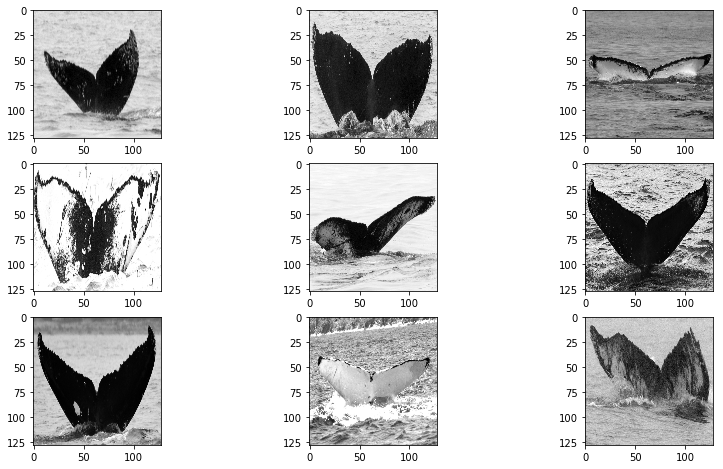

In [10]:
xs = [random.randint(0, X_train.shape[0]-1) for _ in range(9)]   
print("XS ",xs)
plot_images(X_train[xs])

In [11]:
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#change the classes id to 0 1 format
Y_train = keras.utils.to_categorical(Y_train,num_classes=len(unique_classes_id_dict))

print(np.shape(X_train))
print(np.shape(Y_train))

(15697, 128, 128, 1)
(15697, 5004)


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train,Y_train, test_size = 0.15, random_state=42)

In [13]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import SGD, Adadelta, Nadam, Adam
from keras.preprocessing.image import ImageDataGenerator

opt = SGD(lr=0.0001)
nd = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
Adam(lr=0.0001)

In [14]:
def cnn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), strides = (1, 1), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
    model.add(BatchNormalization(axis = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), strides = (1,1)))
    model.add(Activation('relu'))
    model.add(AveragePooling2D((3, 3)))
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dropout(0.6))
    model.add(Dense(len(unique_id_classes_dict), activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
    #model.summary()
    return model
model = cnn()
history = model.fit(X_train, Y_train, validation_data=(x_test, y_test), epochs=50, batch_size=100, verbose=1, callbacks=[
            #EarlyStopping(monitor='val_acc', patience=20, min_delta=0.01, verbose=1),
            ReduceLROnPlateau(monitor='val_acc', patience=3, min_delta=0.1, factor=0.25, min_lr=0.002, verbose=1)
        ])
model.save("nowhale.model")

Train on 15697 samples, validate on 2355 samples
Epoch 1/50
15697/15697 [==============================] - 102s 7ms/step - loss: 8.2998 - acc: 0.0032 - val_loss: 14.3235 - val_acc: 0.0038
Epoch 2/50
15697/15697 [==============================] - 114s 7ms/step - loss: 8.0445 - acc: 0.0048 - val_loss: 15.6123 - val_acc: 0.0047
Epoch 3/50
15697/15697 [==============================] - 183s 12ms/step - loss: 7.9526 - acc: 0.0076 - val_loss: 14.5670 - val_acc: 0.0034
Epoch 4/50
15697/15697 [==============================] - 162s 10ms/step - loss: 7.8344 - acc: 0.0105 - val_loss: 15.2875 - val_acc: 0.0017
Epoch 5/50
15697/15697 [==============================] - 158s 10ms/step - loss: 7.7105 - acc: 0.0120 - val_loss: 16.0906 - val_acc: 0.0017
Epoch 6/50
15697/15697 [==============================] - 182s 12ms/step - loss: 7.5765 - acc: 0.0152 - val_loss: 16.0423 - val_acc: 0.0047
Epoch 7/50
 9600/15697 [=================>............] - ETA: 53s - loss: 7.4209 - acc: 0.0154

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['acc'], color='green', linewidth = 2, 
         marker='o', markerfacecolor='blue', markersize=4) 
plt.title('Whale Identification CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.show()

In [ ]:
SAMPLE_SUBMISSION_FILE="sample_submission.csv"

def getLabel(classes):
    result = []
    for i in range(0, len(classes)):
        _class = unique_id_classes_dict.get(classes[i])
        result.append(_class)
    return result

with open(SAMPLE_SUBMISSION_FILE,"w") as f:
    test_imgs = glob("../input/test/*jpg")
    f.write("Image,Id\n")
    for image in test_imgs:
        #print(image)
        igm = LoadImage(image)
        X_test = np.array(igm)
        X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        Y_test = model.predict_proba(X_test,batch_size=1)
        best_predict_5 = np.argsort(Y_test)[0][::-1][:5]
        pre = getLabel(best_predict_5)
        #print(image, " ".join( pre))
        f.write("%s,%s\n" %(os.path.basename(image), " ".join( pre)))
print("csv created")